In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,
Comm: tls://192.168.121.76:8786,Workers: 0
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,Total threads: 0
Started: 3 hours ago,Total memory: 0 B


In [3]:
samples = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_150GeV_5p0GeV_0p27mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",  

    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_150GeV_5p0GeV_0p27mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
    
    "TTJets",
    "QCD_Pt15To20",
    "QCD_Pt20To30",
    "QCD_Pt30To50",
    "QCD_Pt50To80",
    "QCD_Pt80To120",
    "QCD_Pt120To170",
    "QCD_Pt170To300",
    "QCD_Pt300To470",
    "QCD_Pt470To600",
    "QCD_Pt600To800",
    "QCD_Pt800To1000",
    "QCD_Pt1000",
]

In [4]:
fileset = utilities.make_fileset(samples[:7], 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                 max_files = 20
                                 #max_files =1
                                )

fileset = utilities.make_fileset(samples[7:14], 
                                 "llpNanoAOD_v2",
                                 location_cfg="signal_4mu_v10.yaml",
                                fileset=fileset,
                                max_files = 20, 
                                #max_files =1, 
                                )

fileset = utilities.make_fileset(samples[14:27], 
                                 "skimmed_llpNanoAOD_v2",
                                 location_cfg="backgrounds.yaml",
                                fileset=fileset,
                                max_files = 30, 
                                #max_files =1, 
                                )

In [5]:
runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    # executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(), 
    schema=NanoAODSchema,
#    maxchunks=10, 
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["isolation_base", "lj_lj_base"],
    lj_reco_choices=["0.4"],
    unweighted_hist=True,
)

import coffea.util as coffea_util
coffea_util.save(p, "processor.coffea")
print(coffea_util.load("processor.coffea"))
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset, treename="Events", processor_instance=p)

out = output["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(
/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] Server responded with an error: [3010] Unable to open /store/group/lpcmetx/SIDM/Backgrounds/2018_v2/Skims/QCD_Pt-300To470/skimmed_output_1018.root; permission denied
)

    'root://xcache//store/group/lpcmetx/SIDM/Backgrounds/2018_v2/Skims/QCD_Pt-300To470/skimmed_output_1018.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
        

Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb


In [6]:
samples_2mu2e = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    
    "TTJets",
    "QCD_Pt15To20",
    "QCD_Pt20To30",
    "QCD_Pt30To50",
    "QCD_Pt50To80",
    "QCD_Pt80To120",
    "QCD_Pt120To170",
    "QCD_Pt170To300",
    "QCD_Pt300To470",
    "QCD_Pt470To600",
    "QCD_Pt600To800",
    "QCD_Pt800To1000",
    "QCD_Pt1000",
]

samples_4mu = [    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",
    
    "TTJets",
    "QCD_Pt15To20",
    "QCD_Pt20To30",
    "QCD_Pt30To50",
    "QCD_Pt50To80",
    "QCD_Pt80To120",
    "QCD_Pt120To170",
    "QCD_Pt170To300",
    "QCD_Pt300To470",
    "QCD_Pt470To600",
    "QCD_Pt600To800",
    "QCD_Pt800To1000",
    "QCD_Pt1000",
]

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

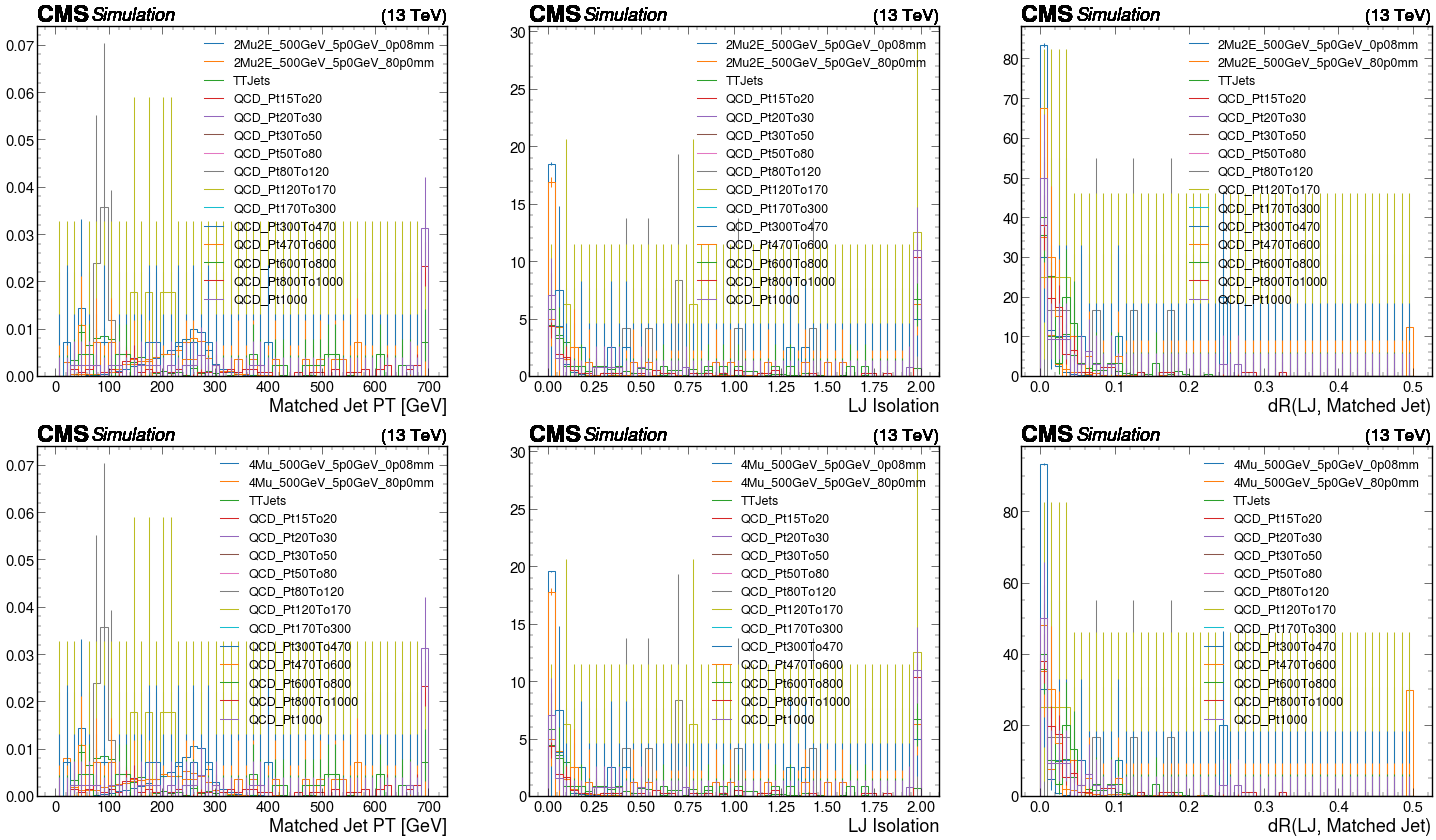

In [7]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

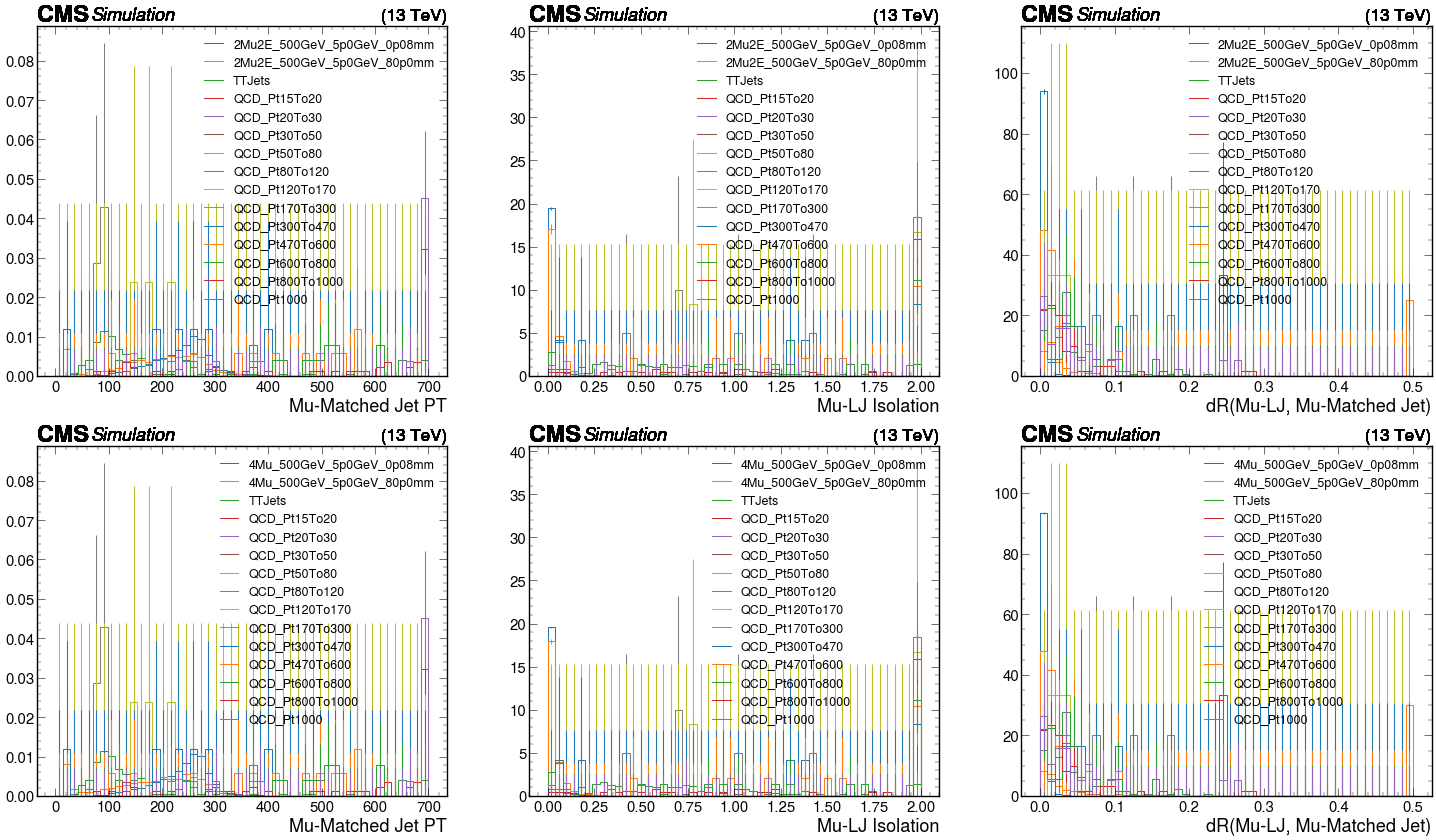

In [8]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

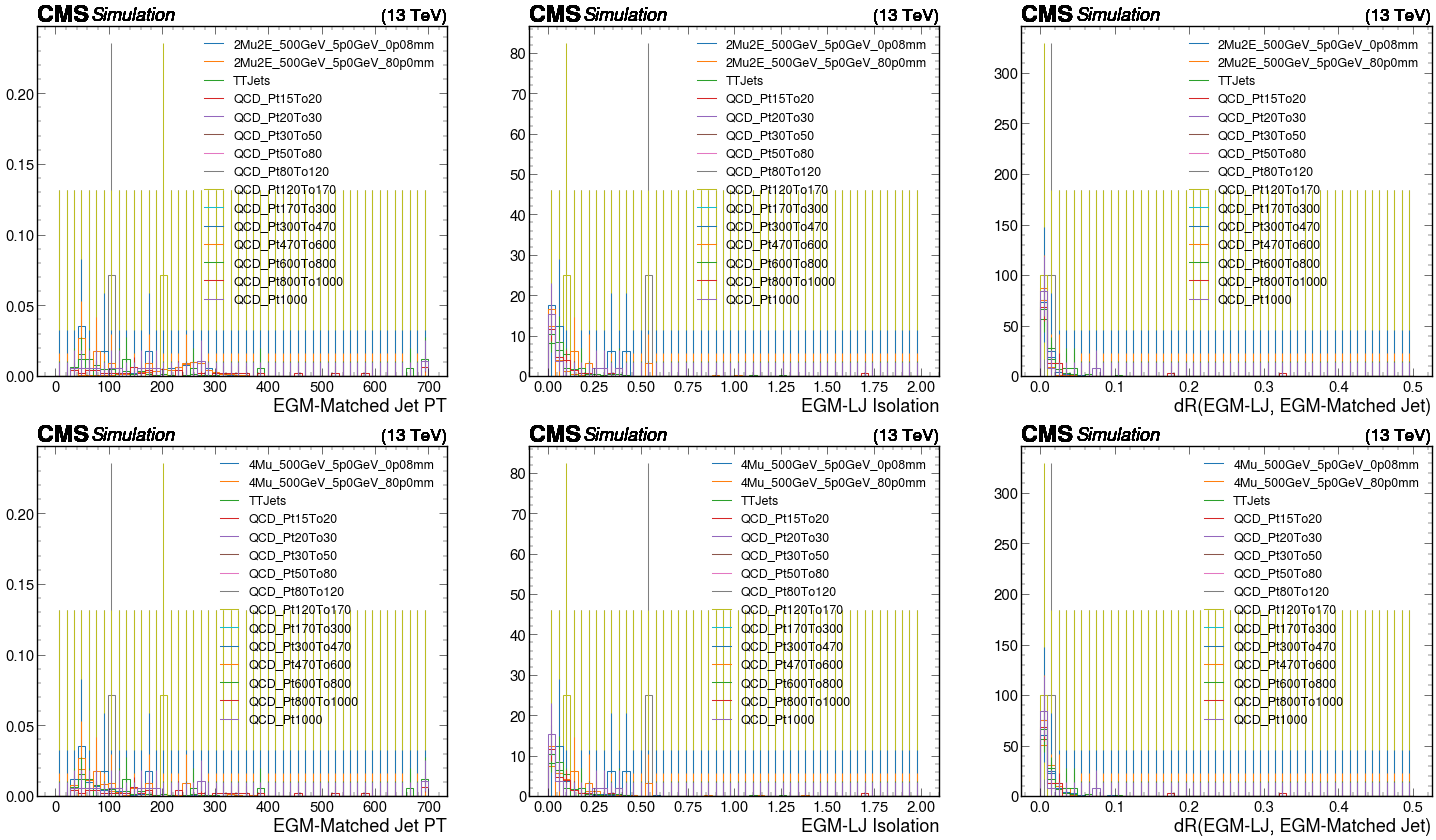

In [9]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

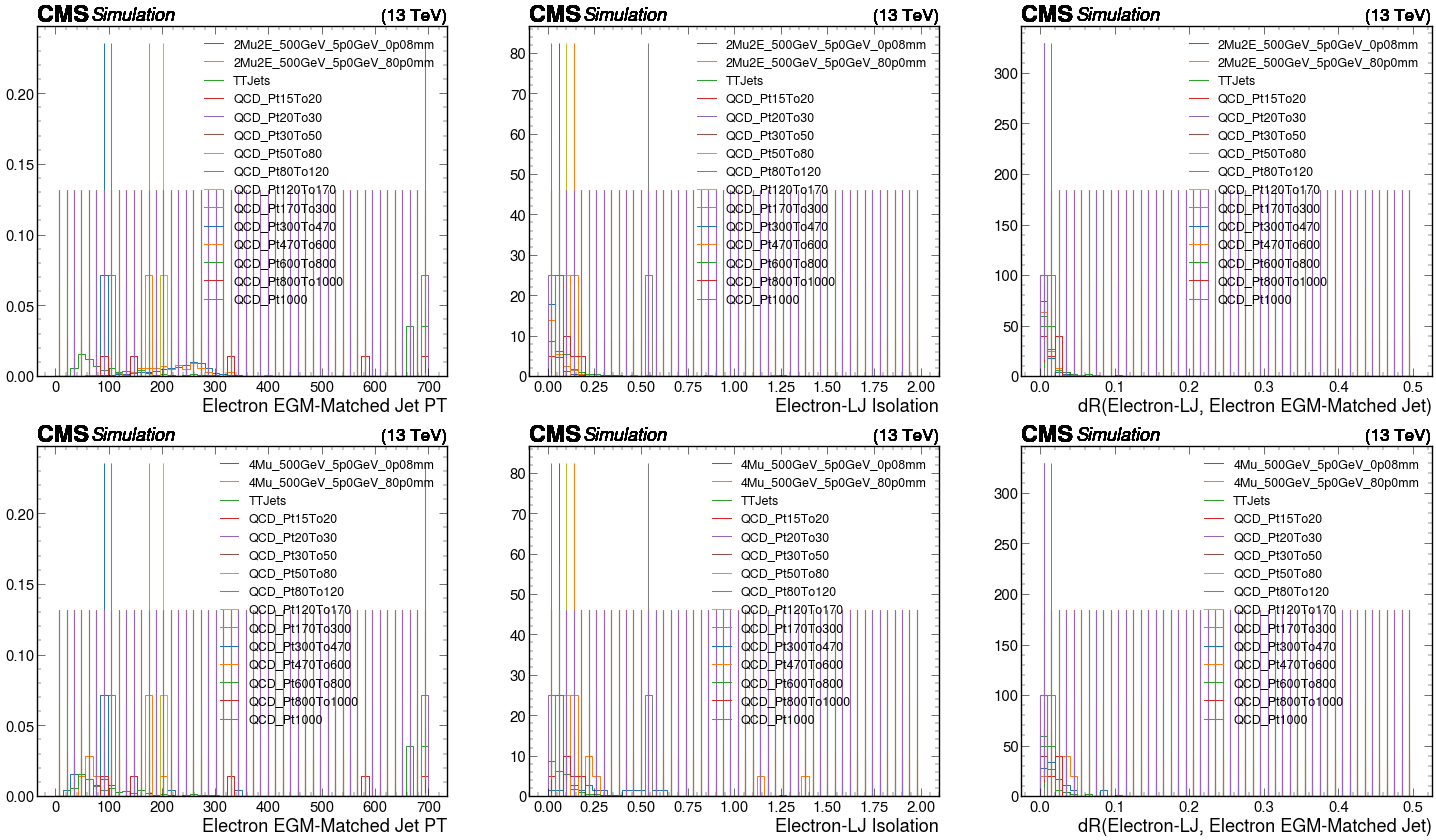

In [10]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["electron_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["electron_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

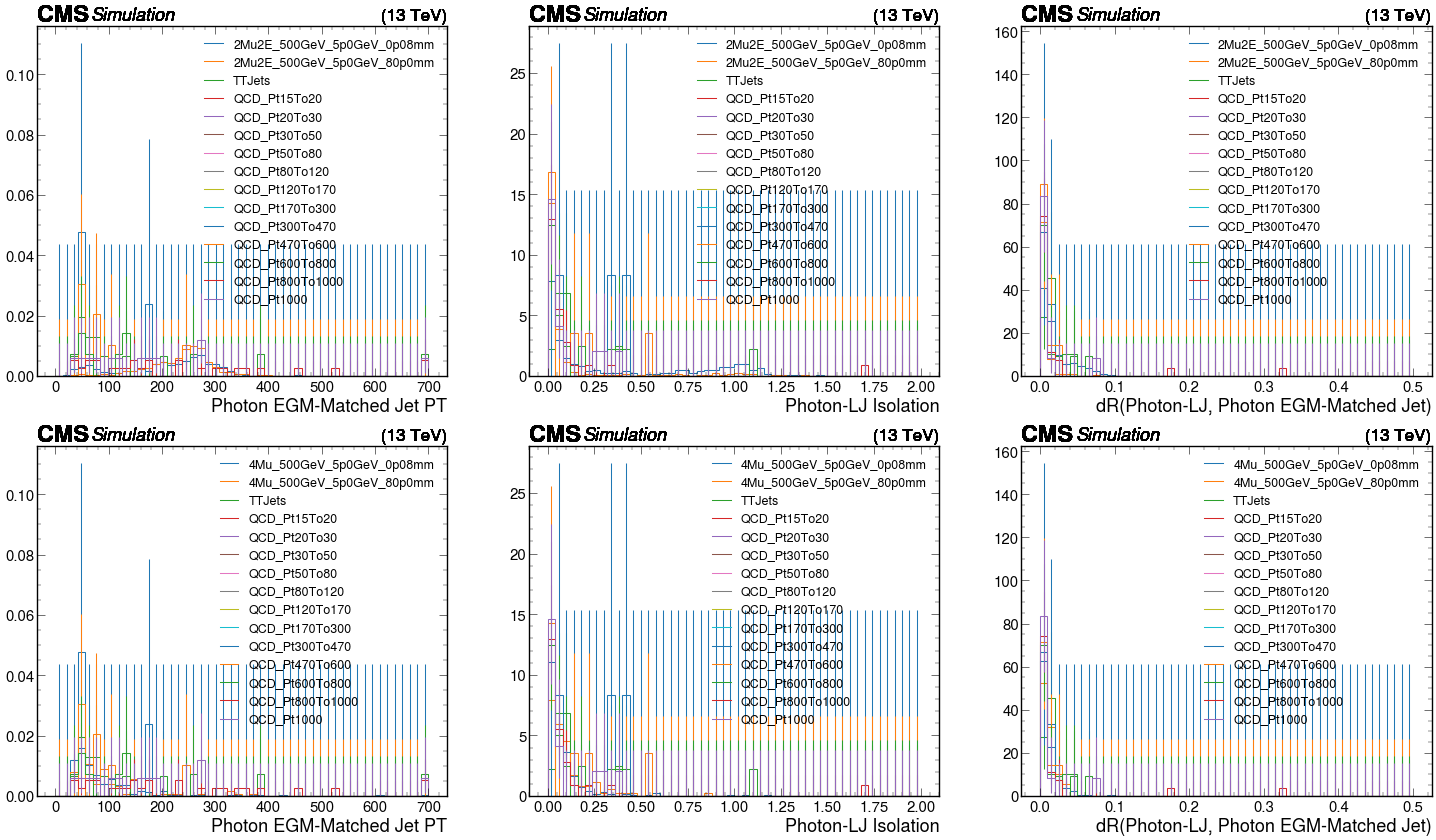

In [11]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["photon_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["photon_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

In [12]:
samples_2mu2e = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_150GeV_5p0GeV_0p27mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",    
]

samples_4mu = [    
    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_150GeV_5p0GeV_0p27mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
]

samples_bkg = [
    "TTJets",
    "QCD_Pt15To20",
    "QCD_Pt20To30",
    "QCD_Pt30To50",
    "QCD_Pt50To80",
    "QCD_Pt80To120",
    "QCD_Pt120To170",
    "QCD_Pt170To300",
    "QCD_Pt300To470",
    "QCD_Pt470To600",
    "QCD_Pt600To800",
    "QCD_Pt800To1000",
    "QCD_Pt1000",
]

In [ ]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

NameError: name 'plt' is not defined

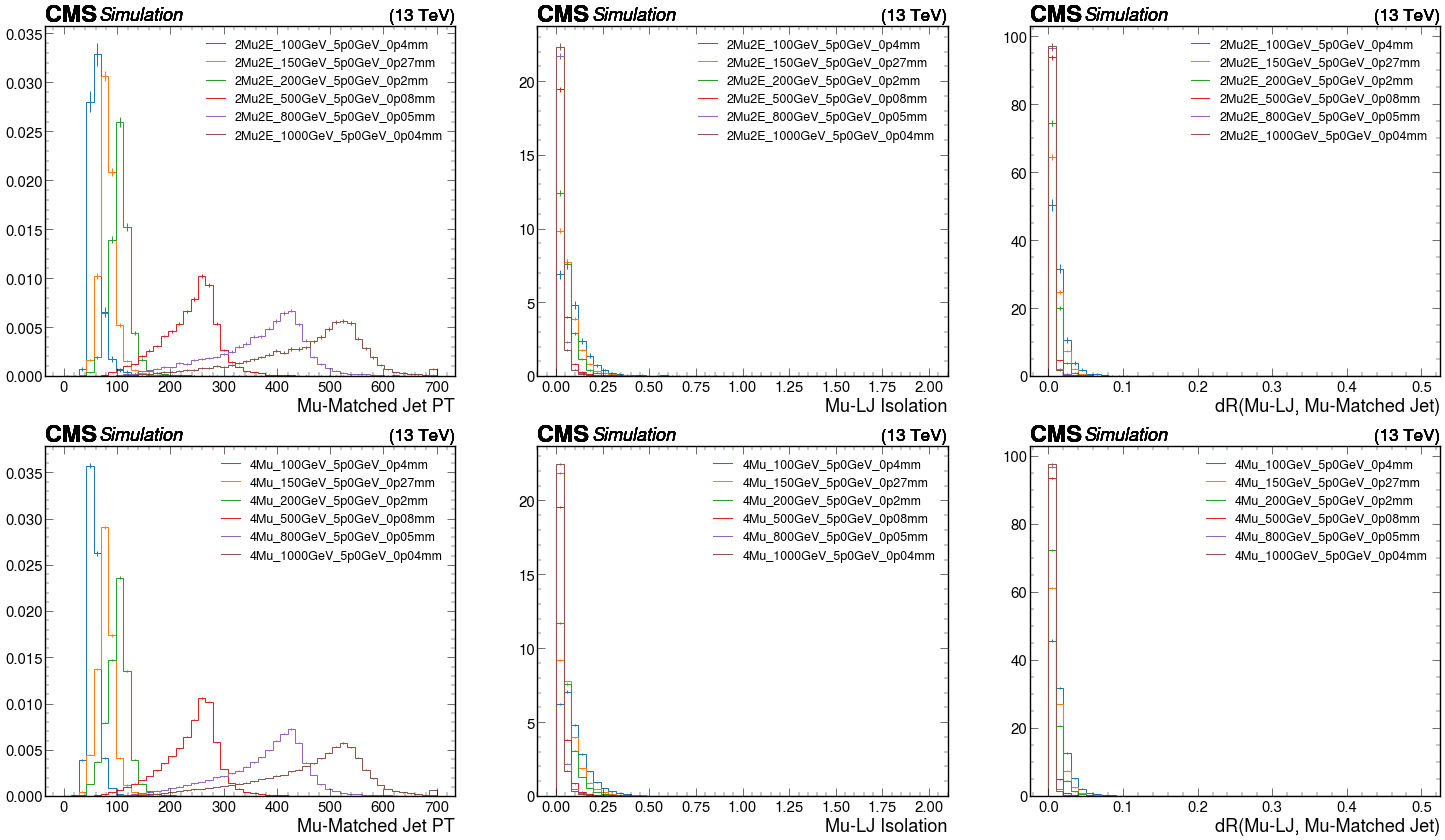

In [14]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

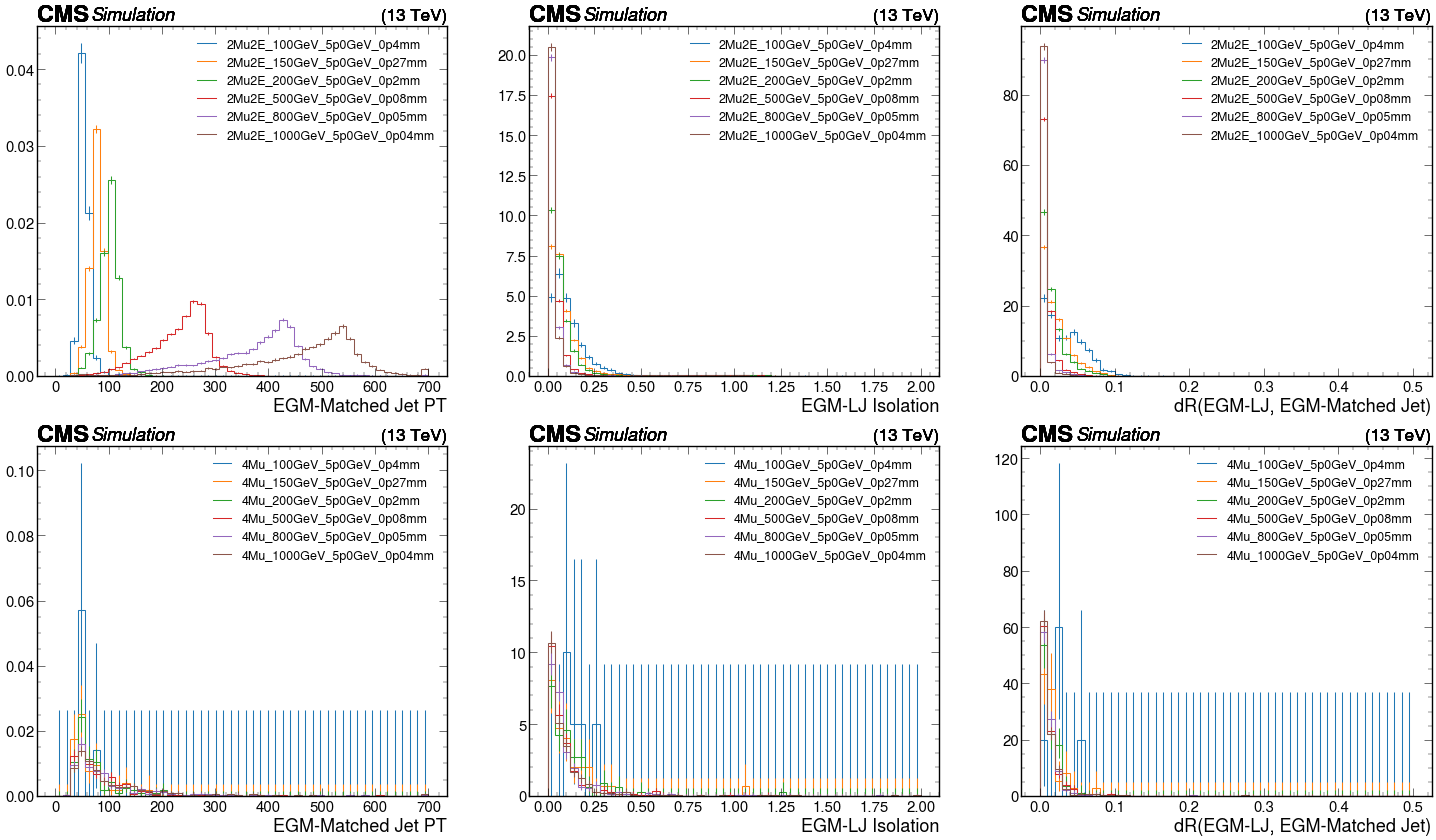

In [15]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

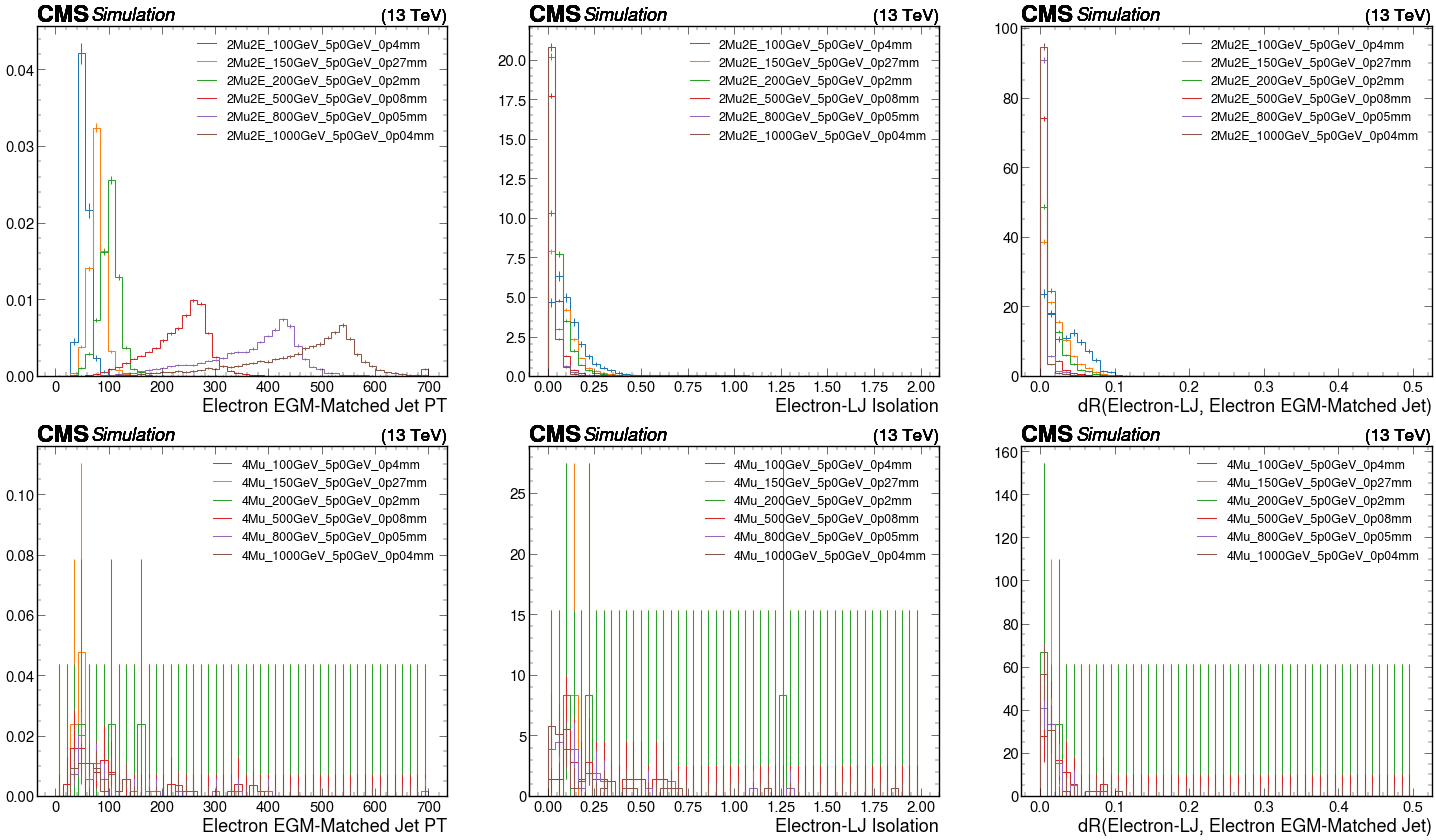

In [16]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["electron_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["electron_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

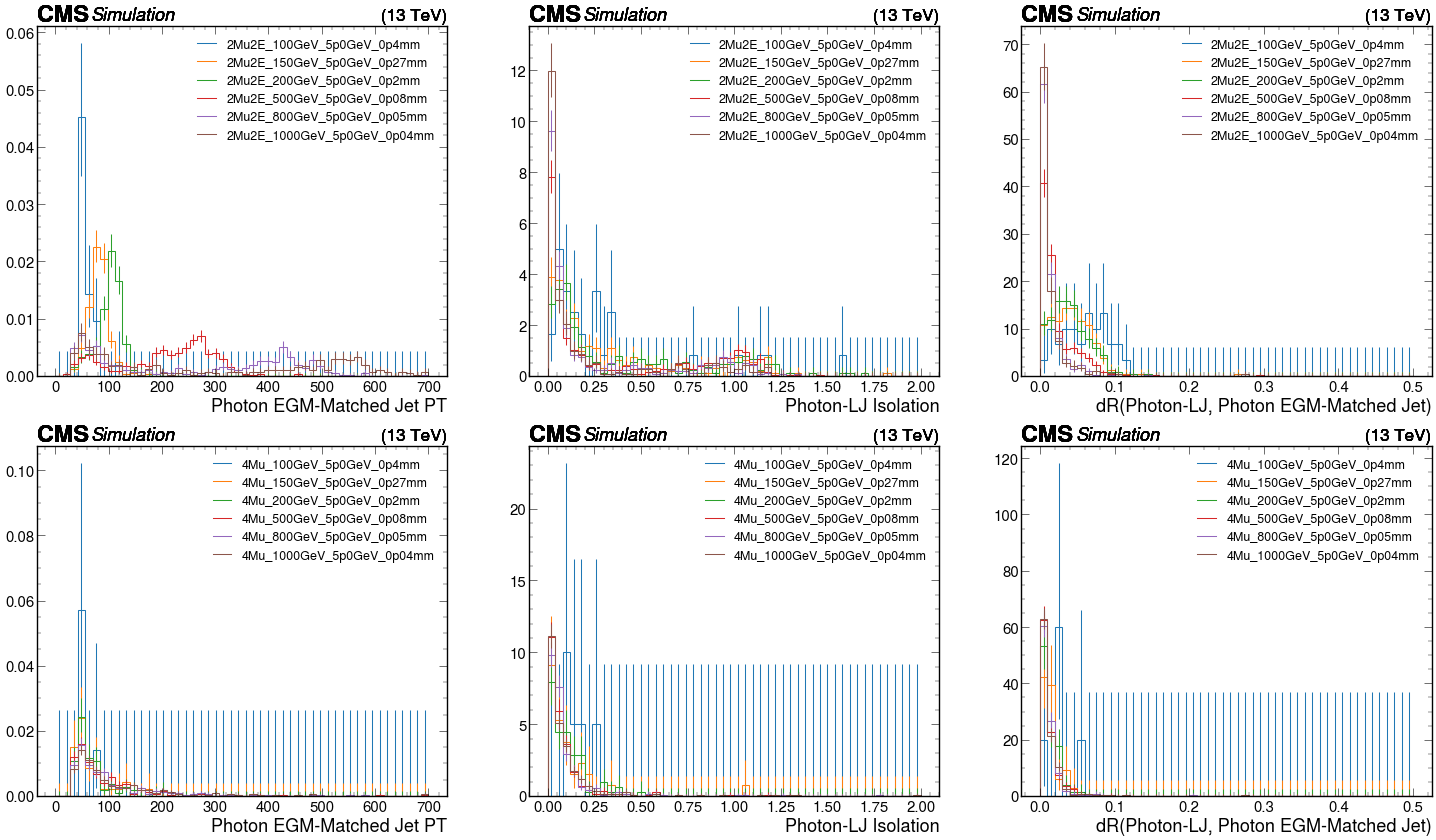

In [17]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["photon_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["photon_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_lj_dR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

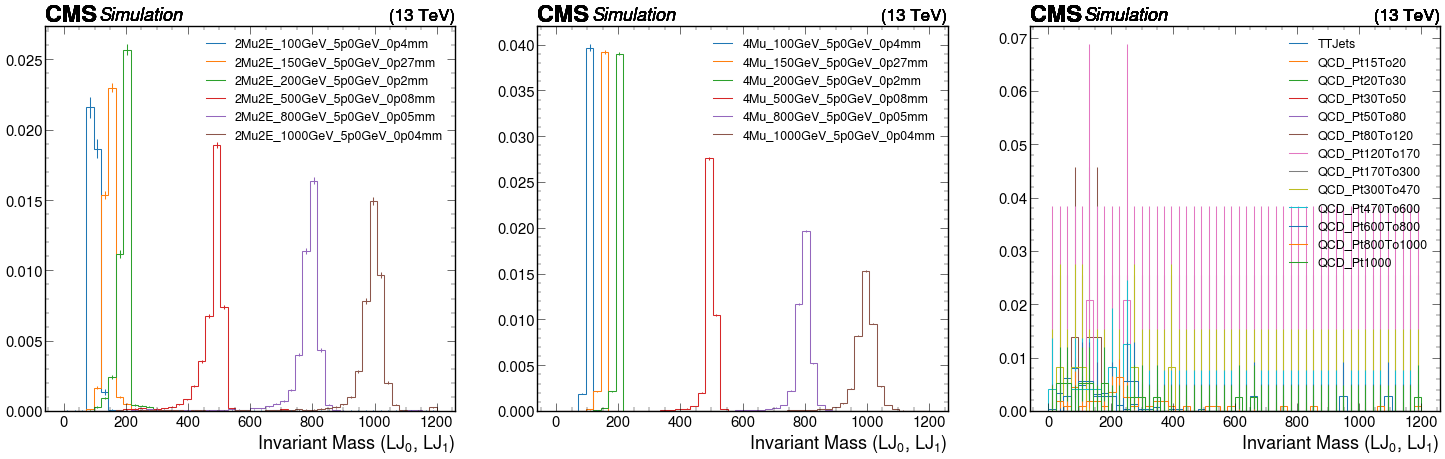

In [18]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(1,3,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(1,3,3)
for sample in samples_bkg:
    utilities.plot(out[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

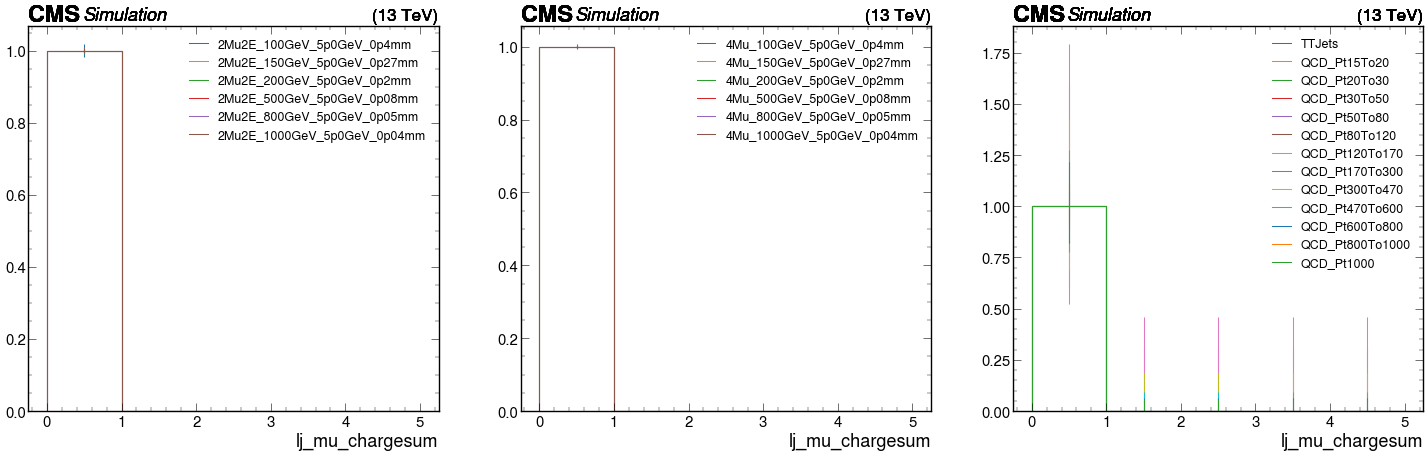

In [19]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["lj_mu_chargesum"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(1,3,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_mu_chargesum"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(1,3,3)
for sample in samples_bkg:
    utilities.plot(out[sample]["hists"]["lj_mu_chargesum"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

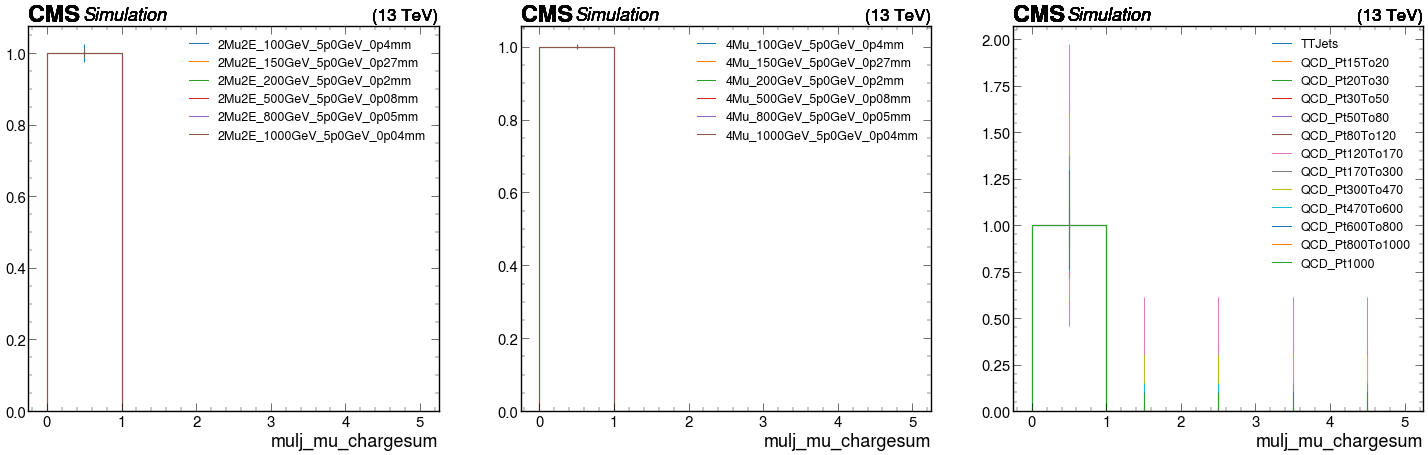

In [20]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mulj_mu_chargesum"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(1,3,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mulj_mu_chargesum"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(1,3,3)
for sample in samples_bkg:
    utilities.plot(out[sample]["hists"]["mulj_mu_chargesum"][channels[0], :], density=True)
plt.legend(samples_bkg, loc=1, prop={'size': 18})